In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scipy
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("coches_dataset2.csv.csv")

#the dataset came with some undefined boolean variables, so let´s erase them 
#because it will be impossible to use them, we´ll also erase the location region
#due to its illegibility
df = df.drop(["manufacturer_name", "model_name","feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region"], axis = 1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transmission      38531 non-null  object 
 1   color             38531 non-null  object 
 2   odometer_value    38531 non-null  int64  
 3   year_produced     38531 non-null  int64  
 4   engine_fuel       38531 non-null  object 
 5   engine_has_gas    38531 non-null  bool   
 6   engine_type       38531 non-null  object 
 7   engine_capacity   38521 non-null  float64
 8   body_type         38531 non-null  object 
 9   has_warranty      38531 non-null  bool   
 10  state             38531 non-null  object 
 11  drivetrain        38531 non-null  object 
 12  price_usd         38531 non-null  float64
 13  is_exchangeable   38531 non-null  bool   
 14  number_of_photos  38531 non-null  int64  
 15  up_counter        38531 non-null  int64  
 16  duration_listed   38531 non-null  int64 

In [ ]:
#Get some more info about the variables in the dataframe:
df.info()

#Know if there is any null value:
df.isnull().values.any() 

#Now how many null values are there in the variable where there are null values:
print(df['duration_listed'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
#There is 1 nan in "duration_listed" variable and 10 in engine_capacity.

#Fill nan´s with the mean average of the respective variable
df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)
#Recheck if there is any null value
print(df.isnull().values.any())

df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transmission      38531 non-null  object 
 1   color             38531 non-null  object 
 2   odometer_value    38531 non-null  int64  
 3   year_produced     38531 non-null  int64  
 4   engine_fuel       38531 non-null  object 
 5   engine_has_gas    38531 non-null  bool   
 6   engine_type       38531 non-null  object 
 7   engine_capacity   38521 non-null  float64
 8   body_type         38531 non-null  object 
 9   has_warranty      38531 non-null  bool   
 10  state             38531 non-null  object 
 11  drivetrain        38531 non-null  object 
 12  price_usd         38531 non-null  float64
 13  is_exchangeable   38531 non-null  bool   
 14  number_of_photos  38531 non-null  int64  
 15  up_counter        38531 non-null  int64  
 16  duration_listed   38531 non-null  int64 

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7


In [ ]:
#Now let´s turn our categorical variables into numerical 
#in order to make our kMeans as profitable as possible

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
df["color"] = le.fit_transform(df["color"])
df["body_type"] = le.fit_transform(df["body_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["is_exchangeable"] = le.fit_transform(df["is_exchangeable"])
df["engine_fuel"] = le.fit_transform(df["engine_fuel"])
df["drivetrain"] = le.fit_transform(df["drivetrain"])
df["state"] = le.fit_transform(df["state"])
df["has_warranty"] = le.fit_transform(df["has_warranty"])
df["engine_type"] = le.fit_transform(df["engine_type"])
df["engine_has_gas"] = le.fit_transform(df["engine_has_gas"])

df.head(5)

,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,0,8,190000,2010,3,0,2,2.5,10,0,2,0,10900.00,0,9,13,16
1,0,1,290000,2002,3,0,2,3.0,10,0,2,0,5000.00,1,12,54,83
2,0,7,402000,2001,3,0,2,2.5,9,0,2,0,2800.00,1,4,72,151
3,1,1,10000,1999,3,0,2,3.0,8,0,2,0,9999.00,1,9,42,86
4,0,0,280000,2001,3,0,2,2.5,10,0,2,0,2134.11,1,14,7,7


Set the dataframe as an array

In [ ]:
from sklearn.compose import ColumnTransformer
X = df

X_train = np.array(X)

set the number of clusters, in this case 12 because there are 12 different car body types, then train the aalgorithm with the training data

In [ ]:
from sklearn.cluster import KMeans

n = 12
km = KMeans(n_clusters = n,init = "k-means++", random_state=5)
y_means = km.fit(X_train)
print(y_means)

KMeans(n_clusters=12, random_state=5)


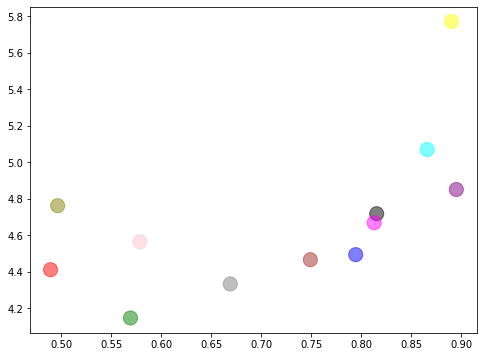

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Scaling the data to normalize
model = KMeans(n_clusters=12).fit(X)

# Visualize it:

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

plt.figure(figsize=(8, 6))
centers = y_means.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = ["red", "blue", "yellow", "grey","purple", "black", "pink", "brown","green", "magenta", "cyan", "olive"], s = 200, alpha = 0.5)


Let´s plot the clusters and its centroids.

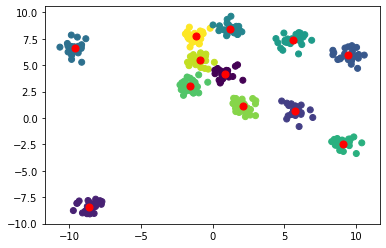

[ 6  4  1  7 10  8  5  4  8  5 11  0  4  9  3  9  4  3  3  5  4  6  4  8
  2  0  9  4 11  5  1 10 10  2  1 11  0  4  9  8 10  0  1  1  2  6  8  3
  5  8  0  1  1  0 10  5 10  5 11  2  2  3  3  8  5  3  1 11  3 10  7  6
  3 10  7  7 10 11  4  5  7  6  8  2  3 10  6 11 11  2  6  9  7  3  7  9
  4  4  1  8  5  2  8 11  5  5  5  6  8 11  3  1  1  2  7 11  3  0 10  4
  9  2  2 11  1  3  9  3 11  8 10  1  5 11 11  9  3  2  4  2  7  7  4  7
  4  6  3  4  4  2  2 11 10  3  5  5  3  9 10  3  1  9  1  9  3  6  0  3
  6  1  0 10  0  7  6  2  4  2  9  4  0  0  2  8  1  6  9 11  8 10  9 10
  7  0 10  4  4  2  7  9  1 11  9  5  6  8  0 10  0  7 10  1  0  6  0  8
  1  5  6  8  5  0  8  6  7  6  9  2  5  6  8 10  8  1  9  0  9  5  5  2
  7  9  3  7 11  5  6  7  1 10  6  1  6  8  0  3  9  2  4  3  9  7 10  1
  8  7  8  5  4 11  7 10  0  9  4 11  6  4  0  6  8  2  7  1  5  8  0 11
 11 11  8 10 10  6  7 11  9  2  7  2]


In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c =pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red')
plt.show()
print(pred_y)


In [ ]:
#create a vector for real data and compare it with the predicted one,
#use sklearn.metrics.adjusted_rand_score

print(df["body_type"].unique())
print(pred_y.shape)

#As it is a numpy array, let´s turn it into a vector for easier manipulation
pred_vector = []
for i in pred_y:
  pred_vector.append(i)
  pred_vector.sort()
print(pred_vector)
print(pred_vector.count(2))
#now lets create a vector with the same amount of each car body type, which 
#will represent the ground truth
real_vector = []
for i in df["body_type"]:
  while (len(real_vector)<300) and (real_vector.count(i)<(300/12)):
    real_vector.append(i)
    real_vector.sort()
print(real_vector)

#Let´s measure the effectiveness of our algorithm:
sklearn.metrics.adjusted_rand_score(real_vector, pred_vector)
#That´s it, it groups in clusters nearly perfcet.


[10  9  8  2  3  6  5 11  7  1  0  4]
(300,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
25


0.8739545011417376

87% of accuracy in the cluster-building compared to the real clusters of the car´s bodytypes.